CMPUT 466 mini-project

In [1]:
# import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# read the data
data = pd.read_csv('parkinsons.data')
data

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,0.426,0.02182,0.03130,0.02971,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,0.626,0.03134,0.04518,0.04368,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,0.482,0.02757,0.03858,0.03590,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,0.517,0.02924,0.04005,0.03772,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,0.584,0.03490,0.04825,0.04465,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,phon_R01_S50_2,174.188,230.978,94.261,0.00459,0.00003,0.00263,0.00259,0.00790,0.04087,0.405,0.02336,0.02498,0.02745,0.07008,0.02764,19.517,0,0.448439,0.657899,-6.538586,0.121952,2.657476,0.133050
191,phon_R01_S50_3,209.516,253.017,89.488,0.00564,0.00003,0.00331,0.00292,0.00994,0.02751,0.263,0.01604,0.01657,0.01879,0.04812,0.01810,19.147,0,0.431674,0.683244,-6.195325,0.129303,2.784312,0.168895
192,phon_R01_S50_4,174.688,240.005,74.287,0.01360,0.00008,0.00624,0.00564,0.01873,0.02308,0.256,0.01268,0.01365,0.01667,0.03804,0.10715,17.883,0,0.407567,0.655683,-6.787197,0.158453,2.679772,0.131728
193,phon_R01_S50_5,198.764,396.961,74.904,0.00740,0.00004,0.00370,0.00390,0.01109,0.02296,0.241,0.01265,0.01321,0.01588,0.03794,0.07223,19.020,0,0.451221,0.643956,-6.744577,0.207454,2.138608,0.123306


In [2]:
# split raw dataset into feature and labels(X and Y)
# and split X and Y to training set, val set and test set
X = data.loc[:,data.columns!='status'].values[:,1:]
Y = data.loc[:,'status'].values
X_train = X[:65]
Y_train = Y[:65]
X_val = X[65:130]
Y_val = Y[65:130]
X_test = X[130:]
Y_test = Y[130:]

print(Y.shape[0], X.shape[0])
print('X_train data shape:',X_train.shape)
print('Y_train data shape:',Y_train.shape)

195 195
X_train data shape: (65, 22)
Y_train data shape: (65,)


In [3]:
# Baseline of zero-rule
output_values = []
predicted = []
for row in Y_train:
  output_values.append(1)
prediction = sum(output_values) / float(len(output_values))
for i in range(len(Y_test)):
  predicted.append(prediction)
test_acc = accuracy_score(Y_test, predicted)
print('The baseline of zero-rule test accuracy is', test_acc)

The baseline of zero-rule test accuracy is 0.6307692307692307


The accuracy for 0.0001 is: 0.769047619047619
The accuracy for 0.001 is: 0.769047619047619
The accuracy for 0.01 is: 0.7857142857142857
The accuracy for 0.1 is: 0.7738095238095238
The accuracy for 1 is: 0.8857142857142858
The accuracy for 10 is: 0.9214285714285714
The accuracy for 20 is: 0.9214285714285714
The best hyperparameter is 10
The LogisticRegression test accuracy is 0.7076923076923077


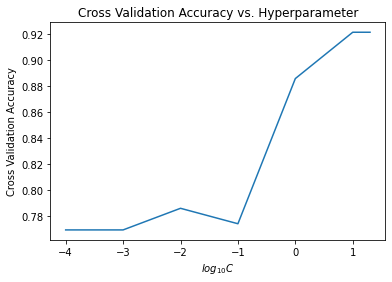

In [8]:
# Logistic Regression
Y_train = Y_train.reshape((len(Y_train),))

# initialize variables
hyperparameters = [0.0001, 0.001, 0.01, 0.1, 1, 10, 20]
best_hyperparameter = 0
validation_accuracy = []
max_accuracy = 0

for temp in hyperparameters:
    # cross validation
    LR = LogisticRegression(C = temp, max_iter=1000)
    cross_val_score_num = cross_val_score(LR, X_train, Y_train, cv=10, scoring='accuracy')
    accuracy = np.mean(cross_val_score_num)
    validation_accuracy.append(accuracy)
    print("The accuracy for",temp,"is:",accuracy)
    if accuracy > max_accuracy:
      best_hyperparameter = temp
      max_accuracy = accuracy

# refit the model using the training set using best hyperparameters
lg = LogisticRegression(C = best_hyperparameter, max_iter=1000)
lg.fit(X_train, Y_train)
y_test = lg.predict(X_test)
test_acc = accuracy_score(Y_test, y_test)
print('The best hyperparameter is', best_hyperparameter)
print('The LogisticRegression test accuracy is', test_acc)


# plot Cross Validation Accuracy Curve
x_axis = np.log10(hyperparameters)
plt.plot(x_axis, validation_accuracy)
plt.xlabel('$log_{10}C$')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs. Hyperparameter')
plt.show()

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 681, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py", line 198, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 570, in _fit
    % type(self.n_neighbors)
TypeError: n_neighbors does not take <class 'float'> value, enter

The accuracy for 0.1 is: nan
The accuracy for 1 is: 0.9714285714285715
The accuracy for 2 is: 0.9428571428571428
The accuracy for 3 is: 0.9095238095238096
The accuracy for 4 is: 0.8452380952380952
The accuracy for 5 is: 0.8738095238095237
The accuracy for 6 is: 0.8261904761904763
The accuracy for 7 is: 0.811904761904762
The accuracy for 8 is: 0.7785714285714287
The accuracy for 9 is: 0.7428571428571429
The accuracy for 10 is: 0.7285714285714285
The best hyperparameter is 1
The KNN test accuracy is 0.676923076923077


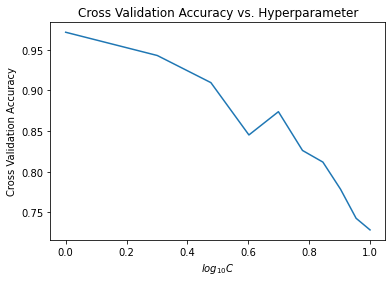

In [9]:
# KNN
Y_train = Y_train.reshape((len(Y_train),))

# initialize variables
hyperparameters = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
best_hyperparameter = 0
validation_accuracy = []
max_accuracy = 0

for temp in hyperparameters:
    # cross validation
    KNN = KNeighborsClassifier(n_neighbors = temp)
    cross_val_score_num = cross_val_score(KNN, X_train, Y_train, cv=10, scoring='accuracy')
    accuracy = np.mean(cross_val_score_num)
    validation_accuracy.append(accuracy)
    print("The accuracy for",temp,"is:",accuracy)
    if accuracy > max_accuracy:
      best_hyperparameter = temp
      max_accuracy = accuracy

# refit the model using the training set using best hyperparameters
KNN = KNeighborsClassifier(n_neighbors = best_hyperparameter)
KNN.fit(X_train, Y_train)
y_test = KNN.predict(X_test)
test_acc = accuracy_score(Y_test, y_test)
print('The best hyperparameter is', best_hyperparameter)
print('The KNN test accuracy is', test_acc)


# plot Cross Validation Accuracy Curve
x_axis = np.log10(hyperparameters)
plt.plot(x_axis, validation_accuracy)
plt.xlabel('$log_{10}C$')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs. Hyperparameter')
plt.show()

The accuracy for 0.1 is: 0.6476190476190476
The accuracy for 0.5 is: 0.8023809523809524
The accuracy for 1 is: 0.769047619047619
The accuracy for 5 is: 0.769047619047619
The accuracy for 10 is: 0.8023809523809524
The accuracy for 100 is: 0.8047619047619048
The accuracy for 1000 is: 0.8238095238095238
The best hyperparameter is 1000
The SVM test accuracy is 0.7846153846153846


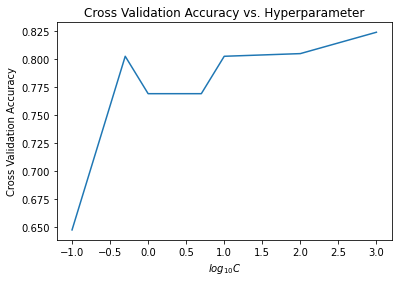

In [6]:
# SVM
Y_train = Y_train.reshape((len(Y_train),))

# initialize variables
hyperparameters = [0.1, 0.5, 1, 5, 10, 100, 1000]
best_hyperparameter = 0
validation_accuracy = []
max_accuracy = 0

for temp in hyperparameters:
    # cross validation
    svm = SVC(C = temp)
    cross_val_score_num = cross_val_score(svm, X_train, Y_train, cv=10, scoring='accuracy')
    accuracy = np.mean(cross_val_score_num)
    validation_accuracy.append(accuracy)
    print("The accuracy for",temp,"is:",accuracy)
    if accuracy > max_accuracy:
      best_hyperparameter = temp
      max_accuracy = accuracy

# refit the model using the training set using best hyperparameters
svm = SVC(C = best_hyperparameter)
svm.fit(X_train, Y_train)
y_test = svm.predict(X_test)
test_acc = accuracy_score(Y_test, y_test)
print('The best hyperparameter is', best_hyperparameter)
print('The SVM test accuracy is', test_acc)


# plot Cross Validation Accuracy Curve
x_axis = np.log10(hyperparameters)
plt.plot(x_axis, validation_accuracy)
plt.xlabel('$log_{10}C$')
plt.ylabel('Cross Validation Accuracy')
plt.title('Cross Validation Accuracy vs. Hyperparameter')
plt.show()